<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br> **Unsupervised Analysis Project** <br><br>
DAT-5329 | Introduction to Machine Learning and AI<br>
Alyssa Brunen<br>
Hult International Business School San Francisco<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


# Introduction And Exploratory Analysis

This analysis was conducted to advise the client on the Facebook elements that lead to success for creators, specifically in the Thai market. It is thought that video social media content has a biggest effect on engagement, which is why most creators are advised to do as many videos as possible to increase viewership and exposure. In this analysis, this is further analyzed by beginning to use k-means clustering and seperating the different post-types into discrete groups. This will be done by taking into account the kind of post, their publishing days and the metrics of the engagement it received. After this, logistic regression modeling will help us categorize the posts of creators into video and non-videos, to further understand the hypothesis that videos have the best effect on engegement. The goal of this analysis is to find trends in the posts, their interactions by viewers and also possibly suggesting a new content strategy. 

In [1]:
# Importimng all packages needed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Dataset Exploration**

In [2]:
# Bringin in the dataset
facebook_data = pd.read_excel("facebook_live_data.xlsx") 
print(facebook_data.head()) #print first few rows

   status_id status_type      time_published  num_comments  num_shares  \
0          1       video 2018-04-22 06:00:00           512         262   
1          2       photo 2018-04-18 03:22:00             0           0   
2          3       video 2018-04-18 00:24:00           614          72   
3          4       photo 2018-04-11 04:53:00             9           1   
4          5       photo 2018-04-09 02:06:00             4           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0        432         92         3          1         1           0  
1        204          9         0          0         0           0  
2        418         70        10          2         0           3  
3        167          3         0          0         0           0  
4        213          5         4          0         0           0  


After loading the initial dataset, exploratory data analysis has been conducted. 
Firstly, the loaded dataset was inspected by loading the first few rows, in order to get a better grasp at the input that can be found in there. 

**Countplot Visualization**

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


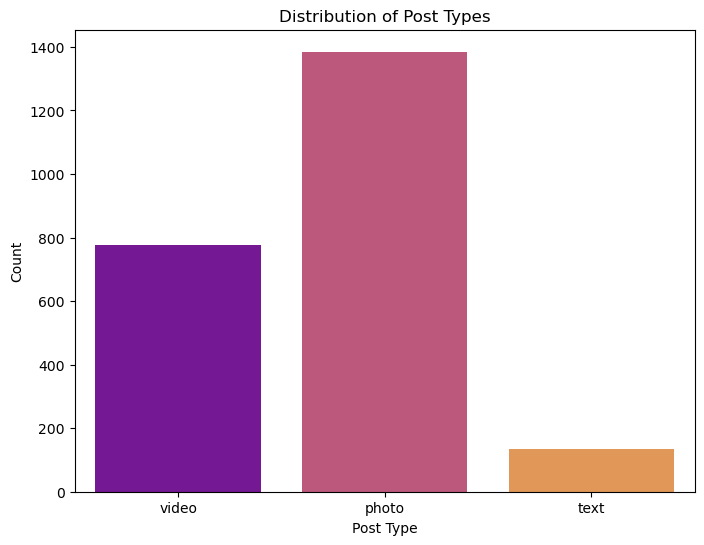

In [3]:
# Data Preprocessing
# Convert 'time_published' column to datetime, to make it better for analysis
facebook_data['time_published'] = pd.to_datetime(facebook_data['time_published'])

# Exploratory Data Analysis in form of a countplot, to see the county of the different types of 
# posts we have in the dataset 
plt.figure(figsize=(8, 6))
sns.countplot(x='status_type', data=facebook_data, palette='plasma')  # Changed palette to 'Pastel1'
plt.title('Distribution of Post Types') #title for plot
plt.xlabel('Post Type') #x axis lable for plot
plt.ylabel('Count') #y axis label for plot
plt.show()

After the initial data was looked at, it is interesting to go back into the business question based on the different types of posts that can be shared by creators. Here a countplot was created that analyzes the counts between the post types of photos, videos and regular texts. This countplot shows that video types of posts for a status update is beeing shared way more significantly than photos or just purely text. This brings us back to the initial hypothesis that it makes sense for the strategists to build their social media presence around the sharing of as many videos as possible. 


**Correlation Heatmap Visualization**

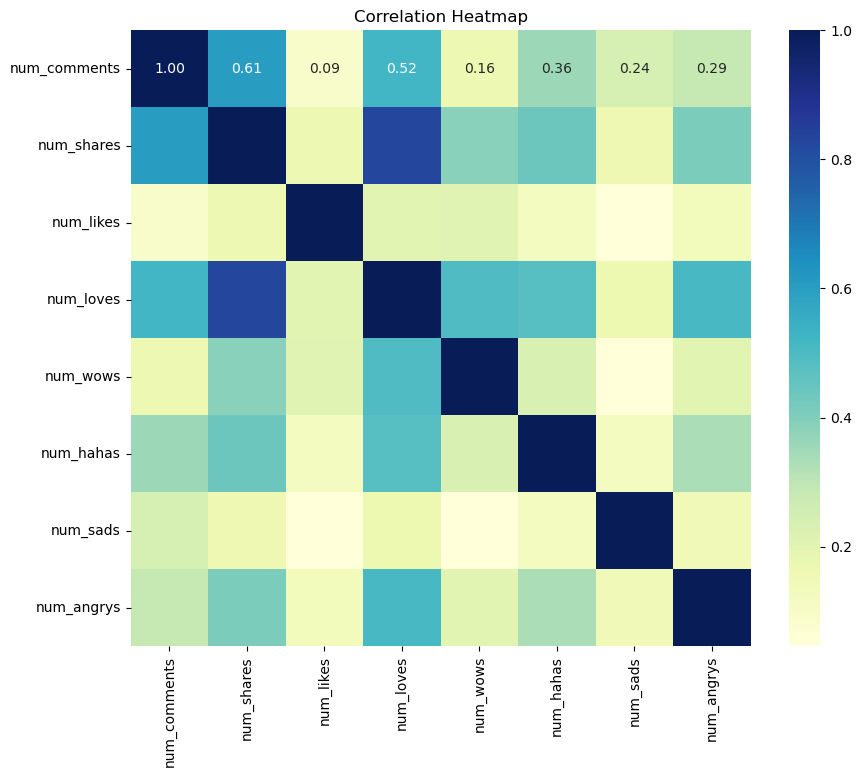

In [4]:
# Data Analysis on correlations within the dataset before building the model
# interesting columns were chosen for the heatmap, the ones that are hypothezised to have a possible impact 
# and could give us business insights 
numeric_columns = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
plt.figure(figsize=(10, 8))
sns.heatmap(facebook_data[numeric_columns].corr(), annot=True, cmap='YlGnBu', fmt=".2f") #choosing only the numeric columns 
plt.title('Correlation Heatmap') #title label 
plt.show()

Lastly, to get a better insight into the interactions with the different posts was analyzed. For this reason, a correlation between all the differengt reaction (interaction) types was done. One part that stands out, is that the highest correlations are between the number of shares and comments, as well as the number of loves with comments and shares. This means that a lot of the sharing comes if the content that the creator is posting is very well received (the highest, best form of reaction- love) and then leading to more viewership for the creator as it got shared by the initial user. This generates amazing creator viewership growth and needs to be further explored on how these creator can release content that gets these reactions for their posts consistently. 

# Reactions, Engagements and Engagement on Specific Reactions

**Total Engagement for videos compared to other media types**

In [5]:
# Filter the dataset to only use the video posts
videos_data = facebook_data[facebook_data['status_type'] == 'video'] 

# Filter the dataset to only non video posts
other_content_data = facebook_data[facebook_data['status_type'] != 'video']

# Summing up total engagement from reactions for videos
videos_total_engagement = videos_data[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum().sum()

# summing up total engagement for all other media
other_content_total_engagement = other_content_data[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum().sum()

# Printing both total Sums
print("Total Engagement for Videos:", videos_total_engagement)
print("Total Engagement for content that is not video:", other_content_total_engagement)

Total Engagement for Videos: 212992
Total Engagement for content that is not video: 332020


Videos typically outperform other types of content in terms of overall interaction. Compared to 332,020 reactions for other sorts of media, videos have gotten 212,992 reactions overall. Considering that video content is almost 40% of the entire media shared, and all the other types are combined in the other content group, the video group is outperforming the others. 

**Avergage Engagement for Specific Reactions on videos and other media types**

In [6]:
# Making average engagement for all videos by reaction
videos_reaction_avg = videos_data[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].mean()

# average for engagemengt for non video posts by reaction
other_content_reaction_avg = other_content_data[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].mean()

#printing the averages
print("\nAverage Engagement on Specific Reactions for Videos:")
print(videos_reaction_avg)  # Printing the average reactions for videos
print("\nAverage Engagement on Specific Reactions for content that is not video::")
print(other_content_reaction_avg)  # Printing the average reactions for other content


Average Engagement on Specific Reactions for Videos:
num_likes     232.989717
num_loves      35.633676
num_wows        2.935733
num_hahas       1.519280
num_sads        0.442159
num_angrys      0.248072
dtype: float64

Average Engagement on Specific Reactions for content that is not video::
num_likes     216.006583
num_loves       1.477288
num_wows        0.749835
num_hahas       0.167215
num_sads        0.152732
num_angrys      0.024358
dtype: float64


Previously the total amount of engagement was considered between videos and the group of any type of other content. When we look at specific reactions, it makes the point made earlier even clearer: Videos are the most interacted with media by viewers and creators. We see through the data for the average engagement on specific reactions for videos that the specific reactions throughout the different types are significantly higher. Though interestingly, this is not the case for 'negative' reactions such as sads or angrys. For the later two, the reactions amount is higher in the other content group that is not video. The most drastic average is for the number of loves, which is at 35,63 for videos while it is only at 1.48 for the other media content. 

Given the wider range of responses, it seems that videos have a greater effect on viewers, eliciting more intense emotional responses and encouraging in-depth interaction with the content, especially if it is a positive reaction.


# Development of principal components (PCA)

**Scree Plot and PCA Set up**

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

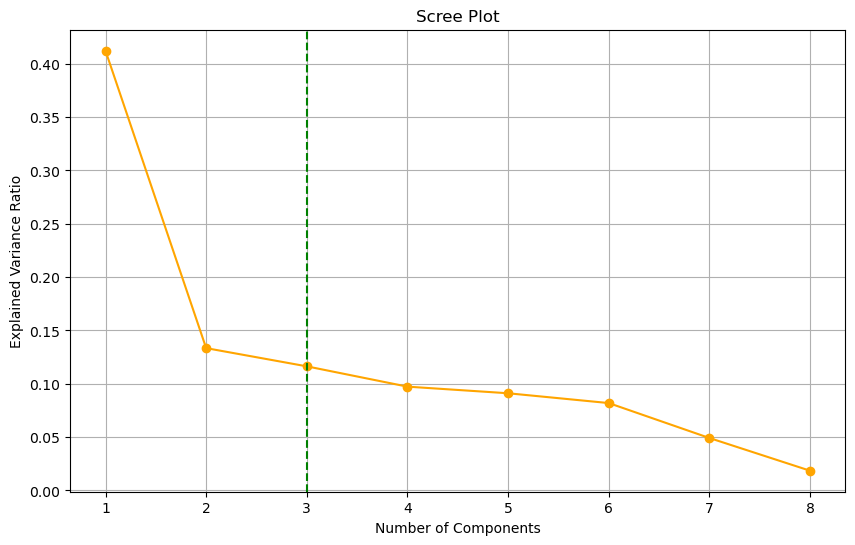

In [7]:
# Scaling the data
scaler = StandardScaler()
#using the scaler on the numeric data columns
data_numeric = facebook_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
data_scaled = scaler.fit_transform(data_numeric)

# Starting the PCA stuff
pca = PCA()

# using the PCA from ^ on the scaled data
principal_components = pca.fit_transform(data_scaled)

#Setting the cutoff at 3 PCA's 
cutoff_point = 3

# Making its Scree plot 
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o',color='orange' ,linestyle='-')
plt.title("Scree Plot") #title for plot
plt.xlabel("Number of Components") #x axis label
plt.ylabel("Explained Variance Ratio")
plt.xticks(np.arange(1, pca.n_components_ + 1)) #for the number of PCA
plt.grid(True) # adding a grid to see things better
plt.axvline(x=cutoff_point, color='green', linestyle='--')  # vertical line for the cutoff at 3 
plt.show()

In the screeplot above one can see the the PCA's variance ratio which shows the proportion of the dataset's variation that each component accounts for. The green vertical line shows that the chosen amount of components is 3, which is chosen through the elbow that one can see that appears at 2 components. The reason that 3 components was chosen is through the rationale that with just one component 40% of variance in the dataset is accounted for. At 2 components however, this dipped down to roughly 14%, and at 3 components it is at 12%, followed by slightly below 10% at 4 components. 3 components seemed to be perfectly in the middle, as it would not be suitable to go further than 4 components. The components 2-8 help explain the variability of the dataset even if their ratios are low compared to component 1. Given that a dataset with 60 variables yielded 8 components via PCA, it is likely that these components account for a significant amount of the dataset's variance and help with the dimensionality reduction and interpretation of the data.

**Factor loadings for the retained principal components**

In [8]:
# Get the principal components up to the cutoff point
pca_components = pca.components_[:cutoff_point]

# Get the feature names
feature_names = data_numeric.columns

# Create a DataFrame to store the component loadings
component_loadings = pd.DataFrame(pca_components.T,
                                   columns=[f'PC{i}' for i in range(1, cutoff_point + 1)],  # PC1, PC2, and PC3 since we made cutoff at 3 
                                   index=feature_names)  # Features as index

# Print the component loadings rounded to 2 decimal places
print("Factor Loadings for Retained Principal Components:")
print(component_loadings.round(2)) #round 2 for the decimal point


Factor Loadings for Retained Principal Components:
               PC1   PC2   PC3
num_comments  0.38  0.33 -0.04
num_shares    0.48  0.03 -0.15
num_likes     0.16 -0.57  0.67
num_loves     0.50 -0.07 -0.13
num_wows      0.30 -0.49  0.00
num_hahas     0.35  0.06 -0.16
num_sads      0.16  0.57  0.70
num_angrys    0.34  0.05 -0.04


**Retained Principal Components**

In [9]:
# Define component names based on what I think matters 
component_names = {
    'PC1': 'Content Engagement',
    'PC2': 'Reaction Diversity',
    'PC3': 'Negative Reactions'
}

# Interpret retained principal components
for component in range(cutoff_point):
    print(f"\nPrincipal Component {component + 1} - {component_names[f'PC{component + 1}']}:") #for the three components
    print("-"*40)
    component_loadings_abs = abs(component_loadings[f'PC{component + 1}'])
    sorted_loadings = component_loadings_abs.sort_values(ascending=False) 

    print("Top Positive Loadings:") #printing for positive loading
    print(sorted_loadings.head())
    print("\nTop Negative Loadings:") #printing negative loading 
    print(sorted_loadings.tail())



Principal Component 1 - Content Engagement:
----------------------------------------
Top Positive Loadings:
num_loves       0.497411
num_shares      0.479823
num_comments    0.380894
num_hahas       0.349796
num_angrys      0.339388
Name: PC1, dtype: float64

Top Negative Loadings:
num_hahas     0.349796
num_angrys    0.339388
num_wows      0.297737
num_likes     0.161475
num_sads      0.158142
Name: PC1, dtype: float64

Principal Component 2 - Reaction Diversity:
----------------------------------------
Top Positive Loadings:
num_sads        0.567098
num_likes       0.565464
num_wows        0.487166
num_comments    0.330231
num_loves       0.068112
Name: PC2, dtype: float64

Top Negative Loadings:
num_comments    0.330231
num_loves       0.068112
num_hahas       0.060862
num_angrys      0.054174
num_shares      0.031460
Name: PC2, dtype: float64

Principal Component 3 - Negative Reactions:
----------------------------------------
Top Positive Loadings:
num_sads      0.700209
num_like

**Interpretation on Retained Principal Components**

**Principal Component 1 - Content Engagement:**

This Component was chosen due to the aspect that engagement is highly important for creator content and content sharing. We saw that the more positive the engagement reaction, the more likely it is for the viewer to share the content, therefore increasing the viewership of the creator profile. This component incoorporates the aspects of the reactions, shares and comments on the content and through the loadings a few things can be seen.<br>   
- Higher values show that the amount of engagement is higher, therefore positive values correlate with an increase level of emotional reactions. <br>
- On the other side, a negative value shows lower like amount as well as negative leaning emotional reactions such as the sad or angry emojis. <br>


**Principal Component 2 - Reaction Diversity:**

As mentioned in the first component, the reaction means a lot to the engagement and the viewership. This component was chosen with that in mind to reflect on the diversity of these reactions, to showcase the spectrum of the emotional reactions left on posts. Earlier it was hypothesized that a positive reaction (loves, likes, etc) lead to also higher shares, while negative on the other hand do not. Similarly to the previous component we can see: <br> 
- Positive values are associated with negative emotional reactions such as sad, angry reaction emojis, as well as comments. This was chosen to be the flip side of PCA1. <br>
- Negative reactions are associated with a higher amount of loves, shares, or laughing emojis.


**Principal Component 3 - Negative Reactions:**

The last component was chosen due to the overall hypothesis that negative emotional reactions lead to a lower amount of viewership and shares. This component looks more closely on the sad and angry emojis. What is interesting here is: <br>
- Positive values show the increase reaction of sad, likes, laughing emojis but also shares. <br>
- On the other side, the negative loading show the low amount of sad, comments and loving emojis. <br>

What is interesting is that this means that if a post has a mixed audience response by emotional reactions drive also the content engagement. 

**Renaming of Principal Components:**

In [10]:
# Define renamed principal components chosen at last step
renamed_components = {
    'PC1': 'Content Engagement',
    'PC2': 'Reaction Diversity',
    'PC3': 'Negative Emotional Reaction'
} # making a list, to simplify 

# Rename principal components
for component in range(cutoff_point):  #for statement that includes all the components
    original_name = f'PC{component + 1}'
    renamed_name = renamed_components[original_name] 
    print(f"Principal Component {component + 1} - Renamed: {renamed_name}")  #making a print statement 
    # that shows all the components chosen


Principal Component 1 - Renamed: Content Engagement
Principal Component 2 - Renamed: Reaction Diversity
Principal Component 3 - Renamed: Negative Emotional Reaction


# Segmentation with K-means Clustering

**Ideal Number of Clusters**

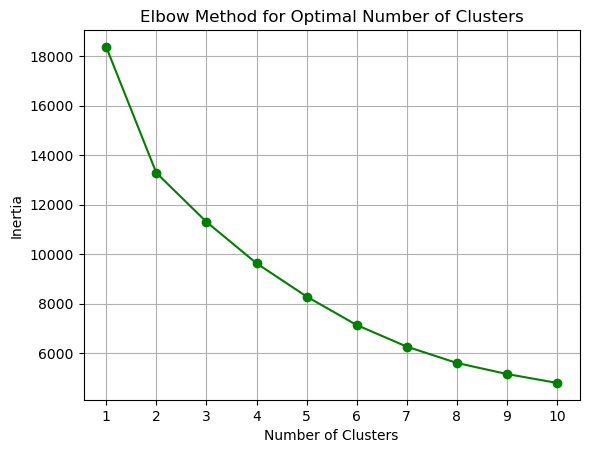

In [11]:
# Calculate inertia for different numbers of clusters
inertia = []
cluster_range = range(1, 11)  # Testing cluster numbers from 1 to 10
for k in cluster_range:
    # Setting the Kmeans for the clusters and setting the n_init to 10 for max 10 clusters to show 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fitting the Kmeans for the PCs 
    kmeans.fit(principal_components)

    # Adding the inertia 
    inertia.append(kmeans.inertia_) 

# elbow plot
plt.plot(cluster_range, inertia, marker='o', color='g')
plt.title('Elbow Method for Optimal Number of Clusters') #title for plot
plt.xlabel('Number of Clusters') #x axis label
plt.ylabel('Inertia')
plt.xticks(cluster_range)  # Show integer ticks for cluster numbers
plt.grid(True)
plt.show()

A way to find an ideal number of clusters to use is the elbow method, where we plot the variance by the numbers of clusters. The ideal number of clusters is where the rate of decrease in variance is significantly slowing down. This can be seen with using the elbow, where this rate of decrease is slowing down. In this case, the number of clusters that may be the most ideal is 4. The reason why this was chosen also was the consideration that at 1 cluster we are at an inertia of roughly 18000, at 2 clusters at 13000, at 3 clusters at 1100 and at 4 clusters at almost 10000. Which means that this rate of decrease is slowing down at 4 clusters the most.

**Fitting KMeans with 4 Clusters**

In [12]:
# Fit KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Kmeans for the 4 chosen clusters 
kmeans.fit(principal_components)  # setting Kmeans on the PCs 

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

**Cluster Centroids**

In [13]:
cluster_centroids = kmeans.cluster_centers_ #setting up the centroids

def find_closest_posts(cluster_centroid):
    # Calculate distances from post to the centroid
    distances = np.linalg.norm(principal_components - cluster_centroid, axis=1)
    #index of closest post
    closest_index = np.argmin(distances)
    #corresponding post
    return facebook_data.iloc[closest_index]

for i, centroid in enumerate(cluster_centroids):
    print(f"\nSegment {i+1} - Cluster Centroid:")
    print(centroid) #printing the centroid
    print("-" * 40)
    print("Analysis") # seeing the analysis for below 
    print("What a 'normal' post in this segment would look like:")
    example_post = find_closest_posts(centroid) #using an example post that is closest 
    # to the centroid bc it will best represent the entire cluster 
    print(example_post) 


Segment 1 - Cluster Centroid:
[-0.44843362  0.07745836 -0.15767602  0.07878689  0.07173528  0.03699824
 -0.00522821  0.004113  ]
----------------------------------------
Analysis
What a 'normal' post in this segment would look like:
status_id                          21
status_type                     photo
time_published    2018-02-09 01:48:00
num_comments                       21
num_shares                         13
num_likes                          95
num_loves                           5
num_wows                            0
num_hahas                           0
num_sads                            0
num_angrys                          0
Name: 20, dtype: object

Segment 2 - Cluster Centroid:
[ 4.15048675  1.40015192  0.13183667 -0.33914569 -0.46049761 -0.61430825
  0.0367267  -0.03628788]
----------------------------------------
Analysis
What a 'normal' post in this segment would look like:
status_id                        1843
status_type                     video
time_published

**Interpretation of Segments**
<br><br><br>
**Segment 1 - High Engagement, Low Reactions**
<br>
This segment has comparatively low values for each of the main components and moderate engagement with minimal variability in reactions. This category's posts have a fair amount of interaction, but not many different kinds of responses.An example of a typical post in this category would be a text-only post from December 24, 2017, which received a respectable amount of likes and comments but no other kind of response which is why it stood out quite drastically.
<br><br><br>
**Segment 2 - Moderate Engagement, Diverse Reactions**
<br>
The posts within this particular segment exhibit a moderate level of engagement along with a wide range of emotions. The first primary component exhibits high values, while the second and third components display moderate values. The audience responds to them in a variety of ways, such as with likes, loves, wows, hahas, sadness, and rage. A video that was posted on November 19, 2017, for example, may fall into this category as it has received a lot of shares, comments, and all kinds of responses.
<br><br><br>
**Segment 3 - Low Engagement, High Negative Reactions**
<br>
Low involvement and a large number of negative reactions define this segment; low values in the first component and high negative values in the second and third components show this. Posts in this category mostly generate unfavorable responses from the audience and get very little engagement. A text-only post from January 24, 2015, with few comments and no favorable replies but a sizable number of negative ones, may be considered a typical post in this category.
<br><br><br>
**Segment 4 - High Engagement, Moderate Reactions**
<br>
Very high values in the first component and low values in the second and third components show that posts in this section have high levels of interaction and a balanced distribution of moderate replies. They generate strong engagement from the audience along with a range of lower reaction.  A video that was posted on March 16, 2018, for example, may fall into this category because it attracted a lot of comments, shares, and mild reactions.
<br><br>

**Renaming Each Segment**

In [14]:
segment_names = {
    0: 'High Engagement, Low Reactions',
    1: 'Moderate Engagement, Diverse Reactions',
    2: 'Low Engagement, High Negative Reactions',
    3: 'High Engagement, Moderate Reactions'
}
#making this a list too 

**Analalyis of Status Types for Segments**

In [15]:
for i, centroid in enumerate(cluster_centroids):
    # Showing which segment its looking at 
    print(f"\nSegment {i+1} - {segment_names[i]}:") #going segment through segment 

    # get the data for that segment 
    segment_indices = np.where(kmeans.labels_ == i)[0]
    segment_data = facebook_data.iloc[segment_indices]

    # Get the percent of what media types there are in teh segment 
    status_type_counts = segment_data['status_type'].value_counts(normalize=True)

    # print the media type distribution
    print("Media Type Distribution:")
    print(status_type_counts)
    print("-" * 40)


Segment 1 - High Engagement, Low Reactions:
Media Type Distribution:
status_type
photo    0.652064
video    0.296576
text     0.051360
Name: proportion, dtype: float64
----------------------------------------

Segment 2 - Moderate Engagement, Diverse Reactions:
Media Type Distribution:
status_type
video    0.953947
photo    0.039474
text     0.006579
Name: proportion, dtype: float64
----------------------------------------

Segment 3 - Low Engagement, High Negative Reactions:
Media Type Distribution:
status_type
video    1.0
Name: proportion, dtype: float64
----------------------------------------

Segment 4 - High Engagement, Moderate Reactions:
Media Type Distribution:
status_type
photo    0.600000
text     0.221429
video    0.178571
Name: proportion, dtype: float64
----------------------------------------


**Analysis Interpretation in Regards to video content**
<br><br><br>
**Segment 1 - High Engagement, Low Reactions**
<br><br>
In this segment, photographs make up the majority of the material (66% of the postings), with videos accounting for around 29% of the content. Videos make up a smaller percentage of the content, but they are still quite present, indicating that they play a part in the high level of engagement that has been recorded. This suggests that, even if they might not be the main form of material, videos are still very important for increasing engagement when combined with other formats.
<br><br><br>
**Segment 2 - Moderate Engagement, Diverse Reactions**
<br><br>
With almost 93% of the content in this segment being videos, they lead over all other content. Videos are highly common in the segment and have a large impact on engagement, which is consistent with the segment's slightly lower levels of viewer engagement. Videos continue to be the leading source of interaction, even with the addition of new status kinds like photographs and text-only postings, which signals a more varied content strategy.
<br><br><br>
**Segment 3 - Low Engagement, High Negative Reactions**
<br><br>
Even though there are the fewest videos (around 17%) of all the segments, they are nonetheless rather obvious.  The high number of text-only postings (23%) and photographs (61%) in this segment, however, indicates that videos might not have the same impact on the audience. The comparatively large percentage of negative responses in this section can suggest that the video content approach needs to be improved in order to better suit audience preferences and lessen negative emotion.
<br><br><br>
**Segment 4 - High Engagement, Moderate Reactions**
<br><br>This segment is made up entirely of videos, with no other material. The lack of alternative status formats emphasizes a targeted content strategy with videos. Videos have very high levels of engagement despite the lack of variety in material types, indicating that they are successful at drawing viewers in and encouraging engagement.
<br><br><br>

#  Logistic Regression Models

**Model 1- Original X-Features**

In [16]:
# setting X and y for Model 1
X_model1 = facebook_data.drop(columns=['status_type', 'time_published'])
y_model1 = (facebook_data['status_type'] == 'video').astype(int)

# making training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y_model1, test_size=0.2, random_state=42)

# Fit logistic regression model
log_reg_model1 = LogisticRegression(max_iter=1000)
log_reg_model1.fit(X_train1, y_train1)

# Predict and show the accuracy
y_pred1 = log_reg_model1.predict(X_test1)
accuracy_model1 = accuracy_score(y_test1, y_pred1)
print("Model 1 Accuracy:", accuracy_model1)


Model 1 Accuracy: 0.7891304347826087


/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

**Model 2- Retained Principal Components**

In [17]:
# X and y for Model 2
X_model2 = principal_components
y_model2 = (facebook_data['status_type'] == 'video').astype(int)

# making training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)

# Fit logistic regression model
log_reg_model2 = LogisticRegression(max_iter=1000)
log_reg_model2.fit(X_train2, y_train2)

# Predict and see accuracy
y_pred2 = log_reg_model2.predict(X_test2)
accuracy_model2 = accuracy_score(y_test2, y_pred2)
print("Model 2 Accuracy:", accuracy_model2)


Model 2 Accuracy: 0.7869565217391304


/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

**Model 3- Retained Clusters**

In [18]:
# segmentation data
segmentation_data = pd.DataFrame({'Cluster': kmeans.labels_})

#X and y for Model 3
X_model3 = pd.get_dummies(segmentation_data['Cluster'], prefix='cluster')
y_model3 = (facebook_data['status_type'] == 'video').astype(int)

# Making training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_model3, y_model3, test_size=0.2, random_state=42)

# Fit logistic regression model
log_reg_model3 = LogisticRegression(max_iter=1000)
log_reg_model3.fit(X_train3, y_train3)

# Predict and see the model accuracy
y_pred3 = log_reg_model3.predict(X_test3)
accuracy_model3 = accuracy_score(y_test3, y_pred3)
print("Model 3 Accuracy:", accuracy_model3)


Model 3 Accuracy: 0.7043478260869566


/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

# Model Selection 

**Selecting the Best Model - Model 1**
<br> <br>
Out of the three models, Model 1 achieves the highest accuracy of 0.789, indicating better performance on the test data. A key performance indicator for classification is accuracy, and selecting the model with the best accuracy gives predictable results. Model 1 suggests that the underlying information in the original features is appropriate for accurate classification since it uses the original features without any dimensionality reduction or grouping. Model 1's interpretability and simplicity are improved by its reliance only on the original characteristics. In light of its higher accuracy and simple feature utilization, Model 1 is the best option for the classification for this analysis.

In [19]:
# getting accuracy and AUC score for Model 1
accuracy_model1 = accuracy_score(y_test1, y_pred1)
auc_score_model1 = roc_auc_score(y_test1, y_pred1)

# Train-test gap based on accuracy
accuracy_train_test_gap = abs(accuracy_model1 - log_reg_model1.score(X_train1, y_train1))

# Train-test gap based on AUC score
y_pred_proba1 = log_reg_model1.predict_proba(X_test1)[:, 1]
auc_train_test_gap = abs(auc_score_model1 - roc_auc_score(y_test1, y_pred_proba1))

# Showing all the model results for accuracy, AUC score and the Train test Gap for both 
print("Model 1 Results:") 
print(f"Accuracy: {accuracy_model1}")
print(f"AUC Score: {auc_score_model1}")
print(f"Train-test gap based on accuracy: {accuracy_train_test_gap}")
print(f"Train-test gap based on AUC score: {auc_train_test_gap}")

Model 1 Results:
Accuracy: 0.7891304347826087
AUC Score: 0.7062515535669899
Train-test gap based on accuracy: 0.021430262005633027
Train-test gap based on AUC score: 0.062018394233159246


/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

**Confusion Matrix**

In [20]:
# Confusion matrix for Model 1
conf_matrix_model1 = confusion_matrix(y_test1, y_pred1)
print("\nConfusion Matrix for Model 1 aka the best model:")
print(conf_matrix_model1)


Confusion Matrix for Model 1 aka the best model:
[[294   4]
 [ 93  69]]


/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype


<br><br>
**True Positives** 
<br>These 294 occurrences are representative of the model's accurate predictions of video uploads as videos.
<br><br>
**True Negatives** 
<br>These cases show that the algorithm correctly identified 69 genuine negatives from non-video postings by classifying them as non-videos.
<br><br>
**False Positives** <br>
These cases show that the model misinterpreted non-video postings as videos, resulting in four false positives. The possibility of misallocating resources to video material that might not receive the anticipated level of interaction exists with false positives.
<br><br>
**False Negatives** <br>
These cases indicate that the model misclassified 93 false negatives, or video postings, as non-videos. False negatives carry the danger of causing interesting video material to be overlooked, which might affect the effectiveness of the content strategy as a whole.
<br><br>
False negatives have a greater risk in this situation as they might result in lost chances to interact with video material. On the other hand, false positives may have a less effect on engagement levels than false negatives, even if they may lead to an inefficient use of resources.